# Figures for BglB thermal stability paper 

## Summary statistics and those that don't fit neatly into categories below

+ unique positions list 
+ PyMOL commands for making a figure showing all the positions mutated 
+ list of mutants that don't express 

## Depictions of conservation across the BglB sequence 

+ percent conservation for each residue from alignment of BglB to Pfam GH1 (1,554 sequences)
+ plot of conservation across BglB sequence 
+ sequence logo 

## Visualization of functional parameters expression, Tm, kcat, KM, and kcat/KM for 125 mutants 

+ diverging color heat map 
+ compact (?) bar plots 

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt 
import pandas
import numpy as np 
from numpy import log10, log2, inf, nan, arange, linspace 

In [3]:
df = pandas.read_csv( '../data_sets/experimental_data/data_set.csv', index_col=0, na_values='?' )

In [4]:
df.describe()

/usr/local/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,sequence_pos,expression,tm,k,err_tm,err_k,kcat,err_kcat,km,err_km,kcatkm,err_kcatkm,ki,ki_percent_err,ki_err,gel_number
count,128.000000,129.000000,78.000000,78.000000,78.000000,78.000000,75.000000,75.000000,75.000000,75.000000,9.100000e+01,91.000000,8.000000,8.000000,8.000000,128.000000
mean,241.531250,0.705426,39.525256,-0.855000,0.258077,0.158590,546.626667,13.242667,11.096133,1.002267,8.018291e+04,4683.787912,227.772500,35.595000,111.186250,10.390625
std,122.181737,0.457628,1.666047,0.373265,0.142656,0.157115,1270.326110,31.536556,13.526521,1.194790,1.810918e+05,8750.349025,167.270111,22.658287,165.916493,5.749679
min,12.000000,0.000000,34.910000,-1.730000,0.040000,0.020000,1.000000,0.100000,0.400000,0.020000,1.000000e+01,1.000000,95.240000,13.700000,13.050000,1.000000
25%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,423.000000,1.000000,45.990000,-0.260000,0.710000,0.860000,11011.000000,258.000000,89.180000,5.890000,1.570000e+06,57175.000000,590.710000,86.560000,511.320000,21.000000


In [5]:
df.corr( method='spearman' )[ 'tm' ]

sequence_pos      0.138200
expression             NaN
tm                1.000000
k                -0.290347
err_tm           -0.032343
err_k             0.262117
kcat             -0.148957
err_kcat         -0.047700
km                0.203408
err_km            0.209221
kcatkm           -0.220386
err_kcatkm       -0.210816
ki                0.261905
ki_percent_err    0.119048
ki_err            0.119048
gel_number        0.226259
Name: tm, dtype: float64

In [6]:
# how many with a Tm within 1 degree of WT?

within = lower = higher = 0
for tm in df.tm:
    if abs( 39.9 - tm ) < 1:
        within += 1 
    elif tm > ( 39.9 + 1 ):
        higher += 1
    elif tm > 0 and tm < 38.9:
        lower += 1
        
print( within, lower, higher ) 

42 25 11


In [7]:
df

,sequence_pos,expression,tm,k,err_tm,err_k,kcat,err_kcat,km,err_km,kcatkm,err_kcatkm,ki,ki_percent_err,ki_err,gel_number
mutant,,,,,,,,,,,,,,,,
G12N,12.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
S14A,14.0,1,40.16,-1.72,0.30,0.37,320.0,11.0,8.25,1.02,38823.0,4972.0,NaN,NaN,NaN,9.0
T15A,15.0,1,39.17,-0.58,0.23,0.07,614.0,14.7,5.30,0.48,115849.0,1.7,NaN,NaN,NaN,2.0
S16N,16.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
S16A,16.0,1,39.41,-0.83,0.27,0.16,154.0,1.0,14.01,0.40,10997.0,331.0,NaN,NaN,NaN,5.0
S17A,17.0,1,41.66,-1.31,0.14,0.44,848.0,76.0,18.45,3.72,45978.0,10135.0,NaN,NaN,NaN,9.0
S17E,17.0,1,39.47,-0.82,0.14,0.08,641.0,9.0,7.32,0.38,87596.0,4719.0,NaN,NaN,NaN,15.0
Y18A,18.0,1,38.26,-0.47,0.23,0.04,197.0,9.0,31.55,3.61,6230.0,773.0,NaN,NaN,NaN,2.0
Q19P,19.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0


# Summary statistics and those that don't fit neatly into categories below

Number of sequence positions mutated:

In [8]:
len( df.sequence_pos.unique() ) 

68

How could you quickly select them in PyMOL? You could use: 

In [9]:
s = '+'.join( [ i for i in df.sequence_pos.dropna().astype( int ).astype( str ) ] ) 
print( 'select all_mutants, resi', s )

select all_mutants, resi 12+14+15+16+16+17+17+18+19+19+19+19+32+34+52+72+76+91+101+119+119+119+120+120+120+121+154+163+163+163+163+163+164+164+164+166+167+167+171+171+175+177+177+177+178+178+192+218+220+220+220+220+220+221+222+222+222+222+222+222+236+240+240+240+240+244+244+249+261+293+293+293+293+293+294+294+294+295+295+296+296+298+300+313+315+315+323+323+325+325+325+325+325+325+329+331+341+343+352+353+354+355+358+362+373+379+379+399+399+399+399+399+400+403+404+404+406+406+407+407+407+407+407+407+409+415+415+423


List of mutants that do not express:

In [10]:
df[( df.expression == 0 )].index

Index(['G12N', 'S16N', 'Q19P', 'S32L', 'W34A', 'R76A', 'H119E', 'W120A',
       'D121F', 'N163K', 'N163E', 'E164G', 'E164R', 'Y166P', 'H178R', 'A236E',
       'R240E', 'A249E', 'M261D', 'N293K', 'N293D', 'Y294L', 'T296A', 'T296E',
       'H315N', 'M323K', 'W325G', 'P329N', 'F343S', 'G355A', 'H379T', 'D403A',
       'W407Y', 'W407Q', 'W407R', 'W407K', 'W407G', 'F415N'],
      dtype='object', name='mutant')

# Conservation along BglB sequence 

Alignment of 1554 Pfam sequences that we trimmed by hand to have catalytic residues as in previous paper 



In [11]:
dat = pandas.read_csv( 'old_stuff/alignment/logo-data-bagel-aligned.txt', sep='\s+' ) 
dat['sequence_pos'] = dat.index + 1 
print( len( dat ) )

445


In [12]:
aas = [ u'A', u'C', u'D', u'E', u'F', u'G', u'H', u'I', u'K', u'L', u'M', u'N', u'P', u'Q', u'R', u'S', u'T', u'V', u'W', u'Y' ]

In [13]:
clean_dat = dat[ aas ].copy()
clean_dat.index = dat.amino_acid 

percents = []
for idx, row in clean_dat.iterrows():
    percents.append( row[ idx.upper() ].astype( float ) / row.sum()  )
    
clean_dat['percents'] = percents
clean_dat['sequence_pos'] = range( 1, 446 ) 
clean_dat[ 'entropy' ] = dat.Entropy

In [14]:
print( len( clean_dat ) )
clean_dat.sample( 5 ) 

445


,A,C,D,E,F,G,H,I,K,L,...,Q,R,S,T,V,W,Y,percents,sequence_pos,entropy
amino_acid,,,,,,,,,,,,,,,,,,,,,
v,116,47,4,13,108,17,15,51,9,24,...,8,19,34,33,109,2,733,0.078024,224,NaN
v,55,1,24,74,1,16,4,1,6,17,...,8,7,11,7,25,0,0,0.077160,363,NaN
h,7,1,1,27,588,34,522,4,0,10,...,85,1,192,14,7,8,32,0.330589,56,NaN
l,57,15,1,0,214,1,8,159,0,741,...,22,2,16,26,69,0,9,0.468099,196,NaN
c,71,252,6,23,14,61,13,150,6,70,...,41,10,115,112,344,2,2,0.161332,167,NaN


In [15]:
# sorry, the above is a terrible hack

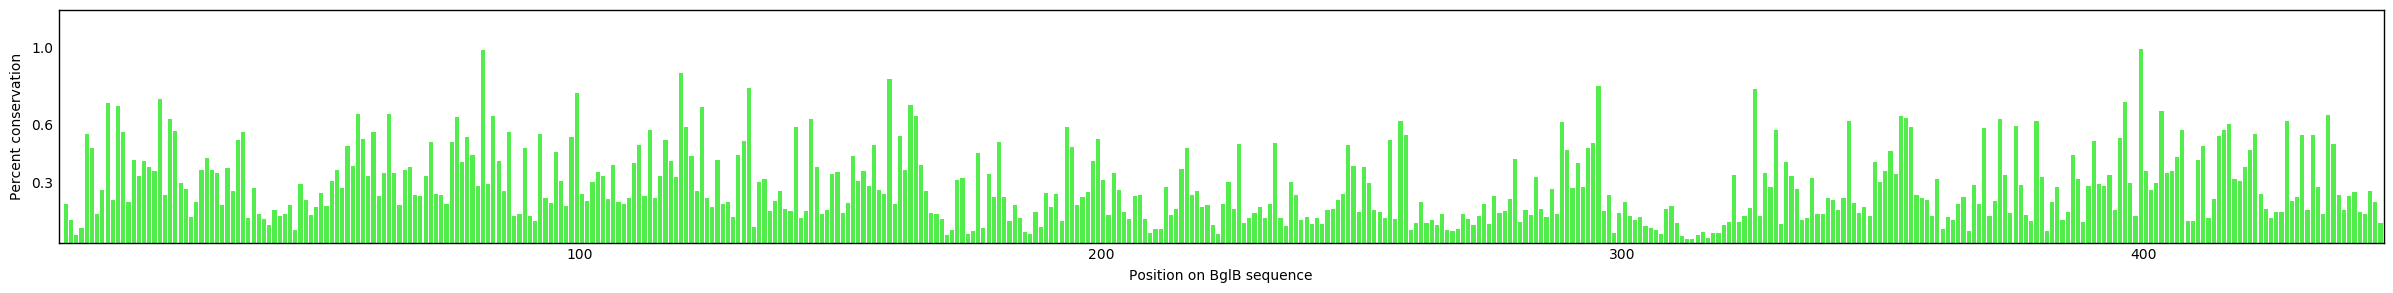

In [16]:
plt.figure( figsize=( 30, 3 ) ) 
plt.bar( dat.sequence_pos, ( dat.Entropy / dat.Entropy.max()) , lw=0, color=(0.03,.9,0,0.7), label='Entropy' )

plt.xlim( 0, 446 ); plt.ylim( 0, 1.2 ) 
plt.xticks( [ 100, 200, 300, 400 ] ) 
plt.ylabel( 'Percent conservation' )
plt.xlabel( 'Position on BglB sequence' ) 
plt.tick_params( length=0 ) 
plt.yticks( [ 0.3, .6, 1 ] ) 
#plt.box(0)
plt.show()

In [17]:
# add the percent conserved to our dataframe for use in heat map 

my_percent_conserved = clean_dat[ [ 'sequence_pos', 'percents' ] ]
my_percent_conserved.index = my_percent_conserved.sequence_pos
my_dict = dict( my_percent_conserved.percents ) 

my_dict

{1: 0.057595392368610512,
 2: 0.026334519572953737,
 3: 0.01889763779527559,
 4: 0.0092735703245749607,
 5: 0.81195335276967928,
 6: 0.82278481012658233,
 7: 0.12653061224489795,
 8: 0.018111254851228976,
 9: 0.97104247104247099,
 10: 0.050706033376123234,
 11: 0.64769820971867009,
 12: 0.9621794871794872,
 13: 0.15930902111324377,
 14: 0.15738963531669867,
 15: 0.61583387410772228,
 16: 0.40233614536015572,
 17: 0.2046783625730994,
 18: 0.45884640311082309,
 19: 0.99028497409326421,
 20: 0.35568326947637291,
 21: 0.98849104859335035,
 22: 0.96151379089159716,
 23: 0.22065426555484285,
 24: 0.063480741797432239,
 25: 0.15975103734439833,
 26: 0.48862853204686424,
 27: 0.27194244604316548,
 28: 0.82138200782268578,
 29: 0.37219730941704038,
 30: 0.06458333333333334,
 31: 0.38386648122392214,
 32: 0.71747448979591832,
 33: 0.47770700636942676,
 34: 0.62277353689567427,
 35: 0.89108280254777072,
 36: 0.25308241401687215,
 37: 0.42012987012987013,
 38: 0.1152832674571805,
 39: 0.0778443113

In [18]:
# add the distance from active site to the dataframe 

dist = pandas.read_csv( '../data_sets/reference/distance_from_active_site.csv', index_col='name', usecols=['name', 'distance'], squeeze=True )
df[ 'distance_from_active_site' ] = dist.loc[ df.index ] 

### Depiction of expression, Tm, kcat, KM, and kcat/KM for 128 mutants 

Heat map style uses a diverging (red/blue) color map to compare the log values relative to wild type

In [19]:
df.loc[ 'BglB' ] 

sequence_pos                       NaN
expression                        1.00
tm                               39.93
k                                -1.19
err_tm                            0.09
err_k                             0.08
kcat                            880.00
err_kcat                         10.00
km                                5.00
err_km                            0.20
kcatkm                       174000.00
err_kcatkm                     8000.00
ki                                 NaN
ki_percent_err                     NaN
ki_err                             NaN
gel_number                         NaN
distance_from_active_site          NaN
Name: BglB, dtype: float64

In [20]:
# to and from G mutants 
for nm in df.index:
    if nm[0] == 'G' or nm[-1] == 'G':
        print( nm, df.loc[ nm ].expression ) 

G12N 0.0
V52G 1.0
E164G 0.0
N220G 1.0
Y295G 1.0
W325G 0.0
G355A 0.0
W399G 1.0
W407G 0.0


In [21]:
df.loc[ 'N404C' ]

sequence_pos                  404.000000
expression                      1.000000
tm                             42.650000
k                              -1.370000
err_tm                          0.240000
err_k                           0.250000
kcat                           85.000000
err_kcat                        3.700000
km                             14.400000
err_km                          1.900000
kcatkm                       5917.000000
err_kcatkm                      1.000000
ki                                   NaN
ki_percent_err                       NaN
ki_err                               NaN
gel_number                     12.000000
distance_from_active_site      11.628839
Name: N404C, dtype: float64

In [22]:
# heat map 

h_cols = [ 'expression', 'tm', 'kcat', 'km', 'kcatkm', 'sequence_pos' ] 
h = df[ h_cols ].copy()

h.tm = h.tm - 39.93 
h.kcat = log10( h.kcat / 880 ) 
h.km = log10( (1/h.km) / (1/5.) )
h.kcatkm = log10( h.kcatkm / 174000 )  
h.expression = h.expression # boolean 
h['percent_conserved'] = h.sequence_pos.map( my_dict )
h.replace( [ -inf ], -5, inplace=True ) # damn son
h = h.sort_values( by='sequence_pos', ascending=True )

# sanity check: what are the WT values after this procedure?  
print( h.loc[ 'BglB' ] )

print( h.head() ) 

expression           1.0
tm                   0.0
kcat                 0.0
km                   0.0
kcatkm               0.0
sequence_pos         NaN
percent_conserved    NaN
Name: BglB, dtype: float64
        expression    tm      kcat        km    kcatkm  sequence_pos  \
mutant                                                                 
G12N             0   NaN       NaN       NaN       NaN          12.0   
S14A             1  0.23 -0.439333 -0.217484 -0.651460          14.0   
T15A             1 -0.76 -0.156314 -0.025306 -0.176657          15.0   
S16N             0   NaN       NaN       NaN       NaN          16.0   
S16A             1 -0.52 -0.756962 -0.447468 -1.199275          16.0   

        percent_conserved  
mutant                     
G12N             0.962179  
S14A             0.157390  
T15A             0.615834  
S16N             0.402336  
S16A             0.402336  


In [23]:
print( h.describe() )

       expression         tm       kcat         km     kcatkm  sequence_pos  \
count  129.000000  78.000000  75.000000  75.000000  91.000000    128.000000   
mean     0.705426  -0.404744  -0.709503  -0.169143  -1.482423    241.531250   
std      0.457628   1.666047   0.848192   0.392397   1.586740    122.181737   
min      0.000000  -5.020000  -2.944483  -1.251297  -4.240549     12.000000   
25%      0.000000        NaN        NaN        NaN        NaN           NaN   
50%      1.000000        NaN        NaN        NaN        NaN           NaN   
75%      1.000000        NaN        NaN        NaN        NaN           NaN   
max      1.000000   6.060000   1.097344   1.096910   0.955350    423.000000   

       percent_conserved  
count         128.000000  
mean            0.499220  
std             0.355953  
min             0.001263  
25%                  NaN  
50%                  NaN  
75%                  NaN  
max             1.000000  


/usr/local/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


### Color maps 

We need color maps for 

|parameter|type|range|colors|n_bins|bins|
---|---
|protein expression|binary|[0,1]|white-black|2|[0],[1]|
|tm|float|[-6,4]|purple green yellow|5|[-1,1], [1-3], [>3], [-3,-1], [<-3]|
|kcat, km, kcat/km|[-5,2]|navy gray gold|?|[-1,1], [-3,-1], [>-3], [1,3], 


In [24]:
# what if we just made a matrix with all the color values in it
# and then passed that to imshow? 

colors = [
    [ ( 0, 0, 0, x.round(2) ) for x in h[ 'percent_conserved' ] ], 
    [ ( 0, 0, 0, x ) for x in h[ 'expression' ] ], 
]
    
colors = pandas.DataFrame( colors ).T

colors.sample( 5 ) 

,0,1
28,"(0, 0, 0, 0.98)","(0, 0, 0, 1)"
39,"(0, 0, 0, 0.25)","(0, 0, 0, 1)"
57,"(0, 0, 0, 0.06)","(0, 0, 0, 1)"
13,"(0, 0, 0, 0.62)","(0, 0, 0, 0)"
48,"(0, 0, 0, 0.36)","(0, 0, 0, 1)"


In [25]:
# correlations between experimental values 
h.corr( method='pearson' )

,expression,tm,kcat,km,kcatkm,sequence_pos,percent_conserved
expression,1.000000,NaN,NaN,NaN,NaN,-0.006858,-0.220287
tm,NaN,1.000000,-0.267999,-0.074541,-0.243263,0.121660,0.356664
kcat,NaN,-0.267999,1.000000,0.163108,0.933744,-0.213974,-0.690307
km,NaN,-0.074541,0.163108,1.000000,0.461682,0.114527,-0.150938
kcatkm,NaN,-0.243263,0.933744,0.461682,1.000000,-0.229722,-0.722870
sequence_pos,-0.006858,0.121660,-0.213974,0.114527,-0.229722,1.000000,0.024341
percent_conserved,-0.220287,0.356664,-0.690307,-0.150938,-0.722870,0.024341,1.000000


In [26]:
h[ [ 'expression', 'tm', 'kcat', 'km', 'kcatkm' ] ].to_csv( 'targets.csv' ) 

([], <a list of 0 Text yticklabel objects>)

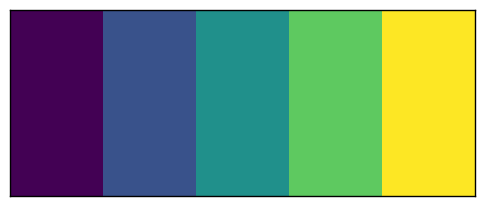

In [27]:
damn_son = np.array( [ arange( -3, 2, 1 ), arange( -3, 2, 1 ), ] )
plt.imshow( damn_son, cmap='viridis', interpolation='none' )
plt.xticks([]); plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

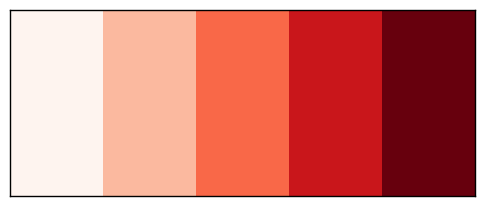

In [28]:

#plt.style.use( 'default' )
damn_son = np.array( [ arange( 1, 100, 20 ), arange( 1, 100, 20 ), ] )
plt.imshow( damn_son, cmap='Reds', interpolation='none' )
plt.xticks([]); plt.yticks([])

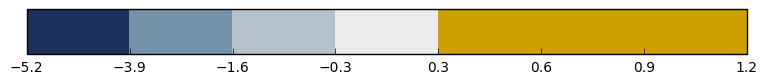

In [29]:
# color map 

from matplotlib import pyplot
import matplotlib as mpl

fig = pyplot.figure(figsize=(8, 3))
ax3 = fig.add_axes([0.05, 0.15, 0.9, 0.15])

cmap = mpl.colors.ListedColormap([
    ( .11, .19, .36 ), # deep blue
    ( .46, .57, .66 ), # medium blue
    ( .71, .76, .80 ), # light blue 
    ( .92, .92, .92 ), # grey 
#   ( .92, .88, .74 ), # light yellow
#   ( .88, .80, .51 ), # medium yellow 
    ( .81, .63, 0. ),  # deep yellow 
    ( .81, .63, 0. ),  # deep yellow 
    ( .81, .63, 0. ),  # deep yellow 
])

cmap.set_over((1., 0., 0.)) # bright red! 
cmap.set_under(( .11, .19, .36 )) # deep blue 

#bounds = [-5.2, -3.9, -2.6, -.3, .3, .6, .9, 1.2 ]
bounds = [-5.2, -3.9, -1.6, -.3, .3, .6, .9, 1.2, ] #2.6, 3.9, 5.2 ]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
#cb3 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap, norm=norm, ticks=[-5, -4, -2, -3, -1, 0, 1], orientation='horizontal')
cb3 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap, norm=norm, orientation='horizontal')
pyplot.show()

In [30]:
my_params = { 
    'tm': {
        'cmap': 'viridis', 'vmin': -4, 'vmax': 4 , 
    }, 
    'expression': {
        'cmap': 'Greys', 'vmin': -0.2, 'vmax': 1.2 , 
    }, 
    'kcat': {
        'cmap': cmap, 'vmin': -4, 'vmax': 4 , 
    }, 
    'km': {
        'cmap': cmap, 'vmin': -4, 'vmax': 4 , 
    }, 
    'kcatkm': {
        'cmap': cmap, 'vmin': -4, 'vmax': 4 , 
    }, 
    'percent_conserved': {
        'cmap': 'Reds', 'vmin': 0, 'vmax': 1, 
    }, 
    'distance_from_active_site': {
        'cmap': 'Yellows', 'vmin': 0, 'vmax': 1, 
    }, 
}

#to_plot = enumerate( [ 'expression', 'tm', 'kcat', 'km', 'kcatkm', 'percent_conserved', 'distance_from_active_site' ] )

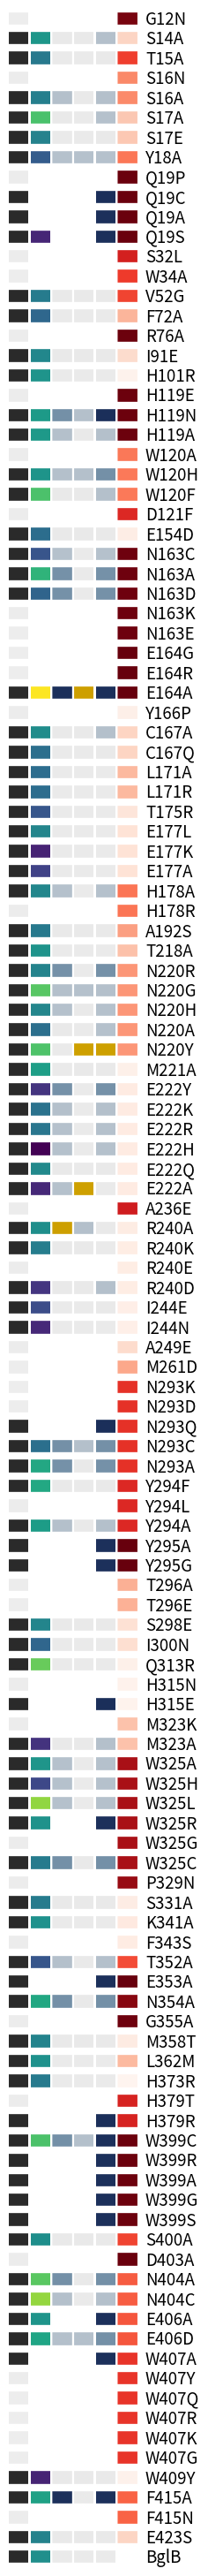

In [31]:
to_plot = enumerate( [ 'expression', 'tm', 'kcat', 'km', 'kcatkm', 'percent_conserved' ] )

plt.figure( figsize=(22,90) ) 
plt.subplots_adjust( left=1., right=1.1 )

for i, col in to_plot:
    plt.subplot( 1, 9, i+3 ) 
    plt.imshow( h[ [ col ] ], interpolation='none', **my_params[ col ] )
    plt.xticks([]); plt.yticks([]) 
    plt.box( 0 ) 

    # white lines 
    plt.plot( [ -.5, .5 ], [ -0.5, -0.5 ], c='w', lw=6 ) # top line :)  
    for i, r in enumerate( h.index ):
        plt.plot( [ -.5, .5 ], [ i+0.5, i+0.5 ], c='w', lw=6 ) 
        
# this is for padding 
#plt.subplot( 1, 8, 8 )
#plt.box( 0 ) 
        
# mutant labels         
font = { 'fontsize': 15, 'fontname': 'Source Sans Pro', }
for i, r in enumerate( h.index ):
    plt.text( .9, i+0.3, r, fontdict=font )

plt.subplots_adjust(wspace=0.1, hspace=0)
#plt.savefig( 'heatmap_out.png', dpi=200 ) 

### Bar plot style 

using minimalistic bar plots, with a thick band indicating a 2-fold spread around native values. 

In [32]:
# bar plot style 

b_cols = [ 'kcat', 'err_kcat', 'km', 'err_km', 'kcatkm', 'err_kcatkm' ] 
j = df[ b_cols ].copy()
j = log10( j + 1 ) 

In [33]:
j.loc['BglB']

kcat          2.944976
err_kcat      1.041393
km            0.778151
err_km        0.079181
kcatkm        5.240552
err_kcatkm    3.903144
Name: BglB, dtype: float64

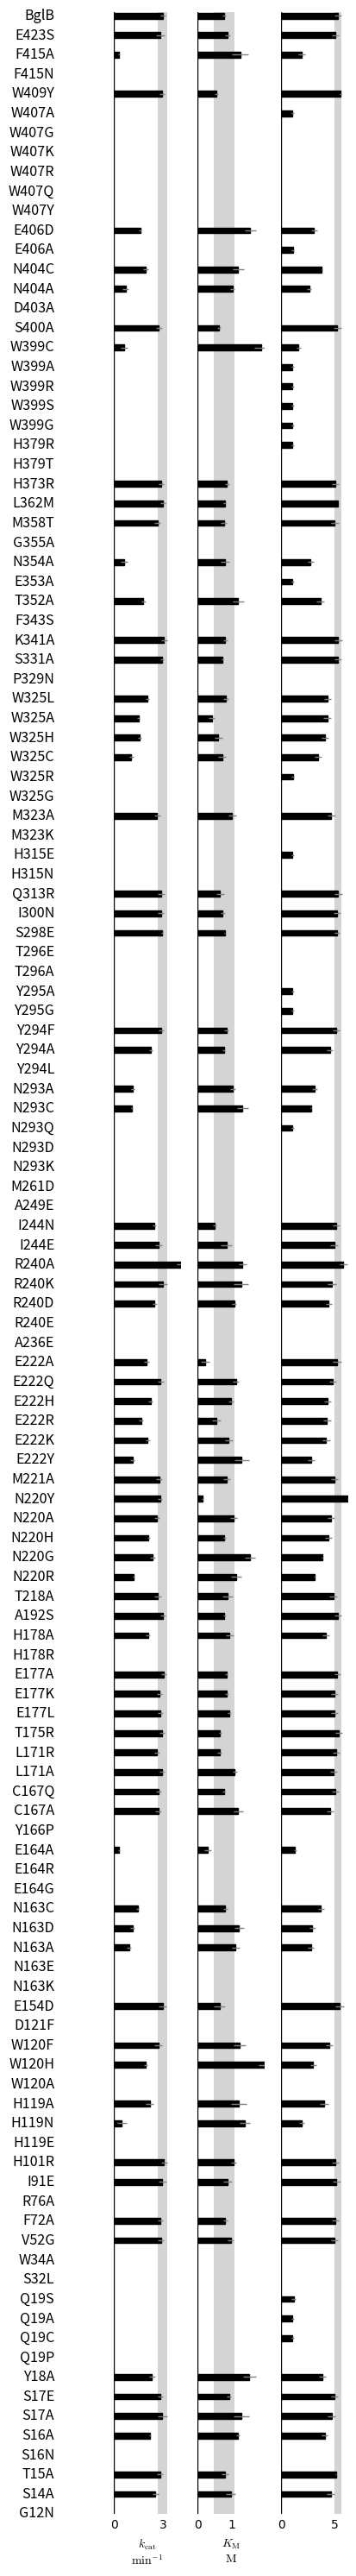

In [34]:
#http://faculty.washington.edu/stuve/log_error.pdf
#describes how to log error bars 

plt.figure( figsize=(5,30) ) 

bar_cols = [ 
    ( 'kcat', 'err_kcat', u'$k_{\mathrm{cat}}$\n$\mathrm{min}^{-1}$' ), 
    ( 'km', 'err_km', u'$K_{\mathrm{M}}$\n$\mathrm{M}$' ), 
    ( 'kcatkm', 'err_kcatkm', '' ), 
]

for i, ( col, err, fmt_str ) in enumerate( bar_cols ):
    plt.subplot( 1, 5, i+1 )
    x_vals = [ i for i in range( len( j ) ) ]
    plt.barh( x_vals, j[col], color='k', height=0.3, edgecolor=None, 
        xerr=0.434*j[err]/j[col],
        ecolor='gray', capsize=0, align='center' )
    plt.tick_params( length=0 ) 
    plt.yticks([])

    my_val = j.loc['BglB'][ col ]              
    plt.fill_between( [my_val - 0.3, my_val + 0.3], 128.2, color=(0,0,0,0.17), linewidth=0 ) 
    
    plt.xticks( [ 0, my_val.round() ] )
    plt.box( 0 ) 
    
    plt.plot( ( 0, 0 ), ( 0, 128.2 ), color='k' ) 
    plt.xlabel( fmt_str )  

for i, r in enumerate( j.index ):
    font = { 'horizontalalignment': 'right', 'fontsize': 13, 'fontname': 'Source Sans Pro', }
    plt.text( -21, i-.2, r, fontdict=font )

plt.subplots_adjust( wspace=0 )
plt.tight_layout()
#plt.savefig( 'bar_plot_out.png', dpi=600 ) 

# Statistical analysis of correlations between Tm, kcat, KM, kcat/KM, conservation, and expression in E. coli 

In [35]:
df.corr( method='pearson' )['tm'] # I love pandas

sequence_pos                 0.121660
expression                        NaN
tm                           1.000000
k                           -0.267309
err_tm                      -0.045518
err_k                        0.245748
kcat                        -0.006706
err_kcat                     0.045570
km                           0.165820
err_km                       0.187458
kcatkm                       0.056937
err_kcatkm                  -0.096269
ki                           0.069617
ki_percent_err               0.262181
ki_err                       0.142197
gel_number                   0.181316
distance_from_active_site   -0.166663
Name: tm, dtype: float64

In [36]:
df[ 'conserved' ] = df.sequence_pos.map( my_dict )
df.corr( method='pearson' )['conserved'] # I love pandas

sequence_pos                 0.024341
expression                  -0.220287
tm                           0.356664
k                            0.210386
err_tm                       0.057837
err_k                       -0.134492
kcat                        -0.271232
err_kcat                    -0.262992
km                           0.214683
err_km                       0.244001
kcatkm                      -0.288379
err_kcatkm                  -0.447208
ki                          -0.386003
ki_percent_err              -0.270256
ki_err                      -0.365885
gel_number                  -0.054216
distance_from_active_site   -0.498677
conserved                    1.000000
Name: conserved, dtype: float64

In [37]:
from scipy.stats import pearsonr

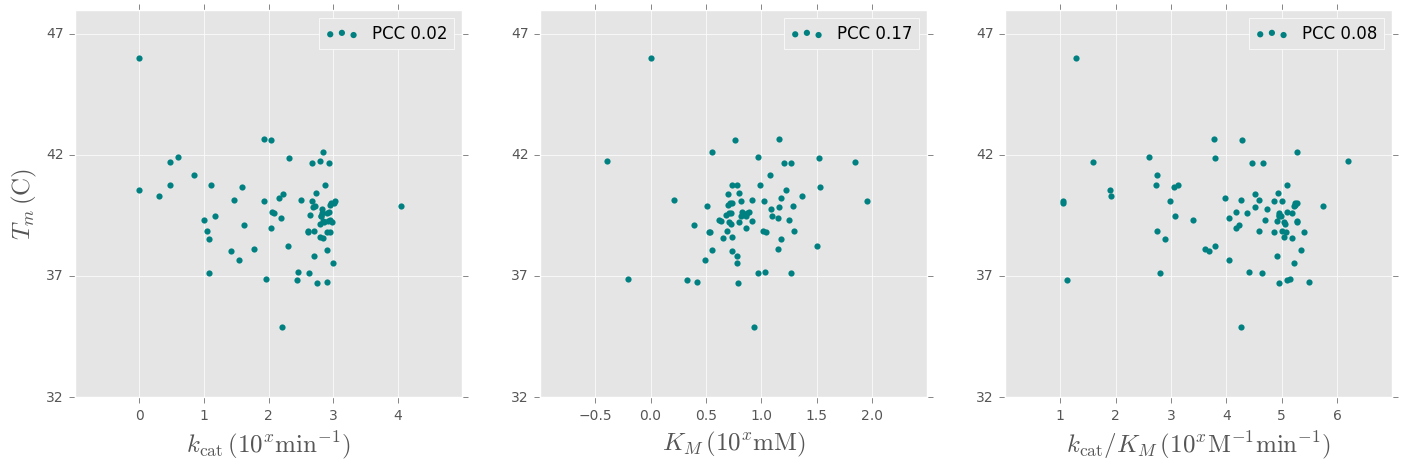

In [49]:
# kinetic constants versus tm 
plt.style.use( 'ggplot' )

constants = [ 
    ( 'kcat', 880, '$k_{\mathrm{cat}}\,(10^x \mathrm{min}^{-1})$', 0.02 ),
    ( 'km', 5.5, '$K_M\,(10^x \mathrm{mM})$', 0.17 ),
    ( 'kcatkm', 17400, '$k_{\mathrm{cat}}/K_M\,(10^x \mathrm{M}^{-1}\mathrm{min}^{-1})$', 0.08 ),
] 

plt.figure( figsize=( 17, 5 ) ) 

for idx, ( constant, native_value, fmt_str, pcc ) in enumerate( constants ):
    
    x = log10( df[ constant ] ) 
    y = df.tm
    my_log_value = log10( native_value ) 
    
    plt.subplot( 1, 3, idx+1 ) 
    plt.scatter( x, y, color='teal', lw=0 ) 
    
    my_x_ticks = plt.xticks()[0]
    plt.xticks( my_x_ticks[1:-1] )
    plt.yticks( [ 32, 37, 42, 47 ] )
    plt.legend( [ 'PCC {0:0.2f}'.format(pcc)])

    plt.xlabel( fmt_str, fontsize=18, fontname='Source Sans Pro' )
    if idx == 0:
        plt.ylabel( '$T_m\,(\mathrm{C})$', fontsize=18, fontname='Source Sans Pro' )
        
#plt.savefig( 'tm_versus_all.png', dpi=600 ) 

In [39]:
# my_dict comes from a line at the very top 
# keys: sequence pos, values: percent conserved at this position
# in alignment of pfam ghf01 

df[ 'conserved' ] = df.sequence_pos.map( my_dict ) 

In [40]:
plt.legend?

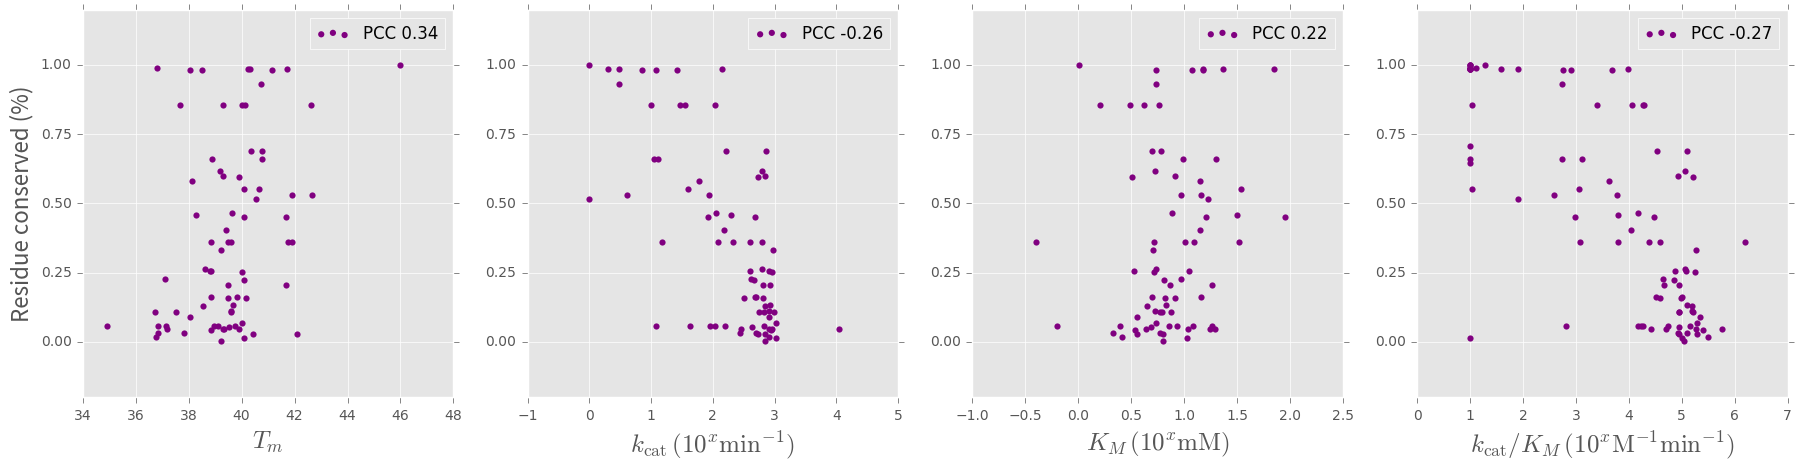

In [53]:
plt.style.use( 'ggplot' )

constants = [ 
    ( 'tm', 39.99, '$T_m$', .34 ), 
    ( 'kcat', 880, '$k_{\mathrm{cat}}\,(10^x \mathrm{min}^{-1})$', -.26 ),
    ( 'km', 5.5, '$K_M\,(10^x \mathrm{mM})$', .22 ),
    ( 'kcatkm', 174000, '$k_{\mathrm{cat}}/K_M\,(10^x \mathrm{M}^{-1}\mathrm{min}^{-1})$', -.27 ),
] 

plt.figure( figsize=( 22, 5 ) ) 

for idx, ( constant, native_value, fmt_str, pcc ) in enumerate( constants ):
    
    if constant != 'tm':
        x = log10( df[ constant ] ) 
    else:
        x = df[ constant ]
    y = df.conserved
    
    plt.subplot( 1, 4, idx+1 ) 
    plt.scatter( x, y, color='purple', lw=0 )
    plt.legend( [ 'PCC {0:0.2f}'.format(pcc)] )
    
    #my_x_ticks = plt.xticks()[0]
    #plt.xticks( my_x_ticks[1:-1] )
    plt.yticks( [ 0, 0.25, .5, .75, 1 ] )

    plt.xlabel( fmt_str, fontsize=18, fontname='Source Sans Pro' )
    if idx == 0:
        plt.ylabel( 'Residue conserved (%)', fontsize=18, fontname='Source Sans Pro' )
        
#plt.savefig( 'tm_versus_all.png', dpi=600 ) 

In [42]:
# mutations that reveal tradeoffs
cc = [ 'kcat', 'km', 'kcatkm' ] 
collect = []
for c in cc:
    collect.append( [
            len( h[ ( h.tm < 0 ) & ( h[c] > 0 ) ] ), 
            len( h[ ( h.tm > 0 ) & ( h[c] < 0 ) ] ), 
        ] )
    
print( collect ) 

#plt.imshow( collect, interpolation='none', cmap='Greys' )
#plt.yticks( range( len( cc ) ), cc )

[[4, 24], [14, 22], [6, 25]]


In [43]:
h[ ( h.tm > 0 ) & ( h.kcat < 0 ) ] 

,expression,tm,kcat,km,kcatkm,sequence_pos,percent_conserved
mutant,,,,,,,
S14A,1,0.23,-0.439333,-0.217484,-0.651460,14.0,0.157390
S17A,1,1.73,-0.016087,-0.567026,-0.577999,17.0,0.204678
H119N,1,0.38,-2.643453,-0.666892,-3.326735,119.0,0.986742
H119A,1,0.30,-0.789147,-0.480007,-1.263603,119.0,0.986742
W120H,1,0.16,-1.020203,-1.251297,-2.266038,120.0,0.452652
W120F,1,1.75,-0.270541,-0.507316,-0.773178,120.0,0.452652
N163A,1,1.23,-2.099385,-0.378398,-2.493915,163.0,0.982997
E164A,1,6.06,-2.944483,0.694649,-3.961796,164.0,1.000000
T218A,1,0.15,-0.277965,-0.114611,-0.387582,218.0,0.222785


In [44]:
h[ ( h.tm > 0 ) & ( h.km > 0 ) ] 

,expression,tm,kcat,km,kcatkm,sequence_pos,percent_conserved
mutant,,,,,,,
E164A,1,6.06,-2.944483,0.694649,-3.961796,164.0,1.000000
N220Y,1,1.81,-0.146523,1.096910,0.955350,220.0,0.361850
Y294A,1,0.44,-0.724375,0.001741,-0.718627,294.0,0.689981
Q313R,1,2.18,-0.106263,0.145087,0.043595,313.0,0.026840
W325A,1,0.20,-1.482085,0.492144,-0.979453,325.0,0.856407


In [45]:
# single feature correlations

In [46]:
# machine learning results 

In [47]:
# data dump 

pandas.options.display.max_rows = 200

df[ [ 'expression', 'tm', 'kcat', 'km', 'kcatkm', 'conserved' ] ]

,expression,tm,kcat,km,kcatkm,conserved
mutant,,,,,,
G12N,0,NaN,NaN,NaN,NaN,0.962179
S14A,1,40.16,320.0,8.25,38823.0,0.157390
T15A,1,39.17,614.0,5.30,115849.0,0.615834
S16N,0,NaN,NaN,NaN,NaN,0.402336
S16A,1,39.41,154.0,14.01,10997.0,0.402336
S17A,1,41.66,848.0,18.45,45978.0,0.204678
S17E,1,39.47,641.0,7.32,87596.0,0.204678
Y18A,1,38.26,197.0,31.55,6230.0,0.458846
Q19P,0,NaN,NaN,NaN,NaN,0.990285
